In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import collections
import datetime
import json
from dateutil import parser
import csv
from matplotlib.font_manager import FontProperties


tqdm.pandas()

In [2]:
def fix_date(date):
    json_acceptable_string = date.replace("'", "\"")
    d = json.loads(json_acceptable_string)
    return(parser.parse(d['$date']))

In [3]:
def bucket(core_periphery):
    if core_periphery > 2 and core_periphery <= 4:
        return 3
    elif core_periphery > 4 and core_periphery <= 7:
        return 4
    elif core_periphery > 7:
        return 5
    else:
        return core_periphery

# Volume of edges over time

## DT

In [233]:
df = pd.read_pickle('Data/Processed Data/Networks/DT-network.pkl')
df['timestamp'] = df['timestamp'].apply(lambda x: x['$date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.date

In [234]:
temp_df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]

In [235]:
count_df = temp_df.groupby('timestamp').count()['_id']

In [239]:
count_df = count_df.to_frame(name='count')

In [241]:
count_df.to_csv('Data/Processed Data/Count per day/DT.csv')

In [62]:
count_dict = count_df.to_dict()

In [63]:
date = []
count = []
for key in sorted(count_dict):
    date.append(key)
    count.append(count_dict[key])


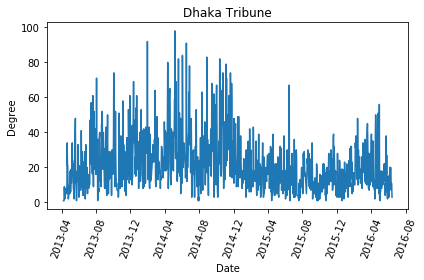

In [65]:
plt.xticks(rotation=70)
plt.title('Dhaka Tribune')
plt.xlabel("Date")
plt.ylabel("Degree")
plt.plot(date, count)

plt.tight_layout()
plt.savefig('Figures/DT-Degree.jpg')
# plt.show()

## DS

In [242]:
df = pd.read_pickle('Data/Processed Data/Networks/DS-network.pkl')

In [243]:
df['timestamp'] = df['timestamp'].progress_apply(fix_date)

100%|██████████| 914208/914208 [01:37<00:00, 9397.67it/s]


In [68]:
# temp_df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]
# count_df = temp_df.groupby('timestamp').count()['_id']
# count_dict = count_df.to_dict()

# date = []
# count = []
# for key in sorted(count_dict):
#     date.append(key)
#     count.append(count_dict[key])

In [244]:
temp_df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]
count_df = temp_df.groupby('timestamp').count()['_id']
count_df = count_df.to_frame(name='count')
count_df.to_csv('Data/Processed Data/Count per day/DS.csv')

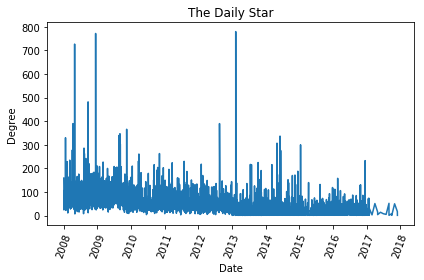

In [70]:
plt.xticks(rotation=70)
plt.title('The Daily Star')
plt.xlabel("Date")
plt.ylabel("Degree")
plt.plot(date, count)

plt.tight_layout()
plt.savefig('Figures/DS-Degree.pdf')
# plt.show()

## NA

In [245]:
df = pd.read_pickle('Data/Processed Data/Networks/NA-network.pkl')

In [246]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [73]:
# temp_df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]
# count_df = temp_df.groupby('timestamp').count()['_id']
# count_dict = count_df.to_dict()

# date = []
# count = []
# for key in sorted(count_dict):
#     date.append(key)
#     count.append(count_dict[key])


In [247]:
temp_df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]
count_df = temp_df.groupby('timestamp').count()['_id']
count_df = count_df.to_frame(name='count')
count_df.to_csv('Data/Processed Data/Count per day/NA.csv')

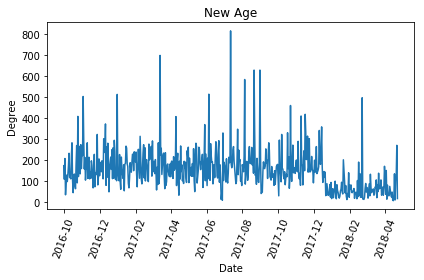

In [75]:
plt.xticks(rotation=70)
plt.title("New Age")
plt.xlabel("Date")
plt.ylabel("Degree")
plt.plot(date, count)

plt.tight_layout()
plt.savefig('Figures/NA-Degree.pdf')
# plt.show()

# Smoothening the curve with expiry dates

In [80]:
expiry_date = 10

## DT

In [88]:
df = pd.read_pickle('Data/Processed Data/Networks/DT-network.pkl')
df['timestamp'] = df['timestamp'].apply(lambda x: x['$date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.date
df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]

In [89]:
df.sort_values(by='timestamp', inplace=True)

In [97]:
subject_objects = []
subject_objects_with_timestamps = []
days = []
edgeOccurencesEachDay = {}

for _, row in df.iterrows():
    date = row['timestamp']
    subject_objects.append(tuple((row['entity0'],row['entity1'])))
    
    for i in range(1,expiry_date+1):
        subject_objects_with_timestamps.append(tuple((row['entity0'],row['entity1'],date)))
        
        if date in edgeOccurencesEachDay:
            edgeOccurencesEachDay[date] += 1
        else:
            edgeOccurencesEachDay[date] = 1
            days.append(date)
            previousDay = date
        date = date + datetime.timedelta(days=1)
        

edgeOccurencesEachDay = (collections.OrderedDict(sorted(edgeOccurencesEachDay.items())))
counter = collections.Counter(subject_objects)
numberOfTupleOccurences = sorted(counter.items())
edgeOccurencesEachDay = (list(edgeOccurencesEachDay.values()))

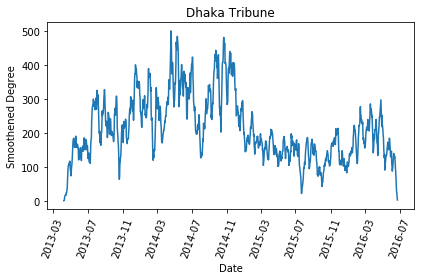

In [102]:
plt.xticks(rotation=70)
plt.title("Dhaka Tribune")
plt.xlabel("Date")
plt.ylabel("Smoothened Degree")
plt.plot(days, edgeOccurencesEachDay)

plt.tight_layout()
plt.savefig('Figures/DT-10daysmoothened-Degree.pdf')

## DS

In [126]:
df = pd.read_pickle('Data/Processed Data/Networks/DS-network.pkl')
df['timestamp'] = df['timestamp'].progress_apply(fix_date)
df['timestamp'] = df['timestamp'].dt.date

100%|██████████| 914208/914208 [01:40<00:00, 9128.03it/s]


In [127]:
df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]

In [128]:
df.sort_values(by='timestamp', inplace=True)

In [136]:
df[df['timestamp']>parser.parse('2017-01-01').date()].shape

(731, 10)

In [129]:
subject_objects = []
subject_objects_with_timestamps = []
days = []
edgeOccurencesEachDay = {}

for _, row in df.iterrows():
    date = row['timestamp']
    subject_objects.append(tuple((row['entity0'],row['entity1'])))
    
    for i in range(1,expiry_date+1):
        subject_objects_with_timestamps.append(tuple((row['entity0'],row['entity1'],date)))
        
        if date in edgeOccurencesEachDay:
            edgeOccurencesEachDay[date] += 1
        else:
            edgeOccurencesEachDay[date] = 1
            days.append(date)
            previousDay = date
        date = date + datetime.timedelta(days=1)
        

edgeOccurencesEachDay = (collections.OrderedDict(sorted(edgeOccurencesEachDay.items())))
counter = collections.Counter(subject_objects)
numberOfTupleOccurences = sorted(counter.items())
edgeOccurencesEachDay = (list(edgeOccurencesEachDay.values()))

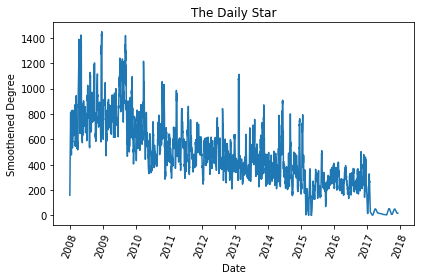

In [131]:
plt.xticks(rotation=70)
plt.title("The Daily Star")
plt.xlabel("Date")
plt.ylabel("Smoothened Degree")
plt.plot(days, edgeOccurencesEachDay)

plt.tight_layout()
plt.savefig('Figures/DS-10daysmoothened-Degree.pdf')

## NA

In [118]:
df = pd.read_pickle('Data/Processed Data/Networks/NA-network.pkl')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.date

In [120]:
df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]

In [122]:
df.sort_values(by='timestamp', inplace=True)

In [123]:
subject_objects = []
subject_objects_with_timestamps = []
days = []
edgeOccurencesEachDay = {}

for _, row in df.iterrows():
    date = row['timestamp']
    subject_objects.append(tuple((row['entity0'],row['entity1'])))
    
    for i in range(1,expiry_date+1):
        subject_objects_with_timestamps.append(tuple((row['entity0'],row['entity1'],date)))
        
        if date in edgeOccurencesEachDay:
            edgeOccurencesEachDay[date] += 1
        else:
            edgeOccurencesEachDay[date] = 1
            days.append(date)
            previousDay = date
        date = date + datetime.timedelta(days=1)
        

edgeOccurencesEachDay = (collections.OrderedDict(sorted(edgeOccurencesEachDay.items())))
counter = collections.Counter(subject_objects)
numberOfTupleOccurences = sorted(counter.items())
edgeOccurencesEachDay = (list(edgeOccurencesEachDay.values()))

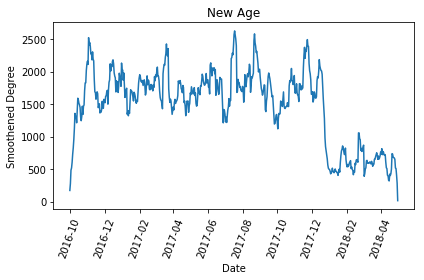

In [125]:
plt.xticks(rotation=70)
plt.title("New Age")
plt.xlabel("Date")
plt.ylabel("Smoothened Degree")
plt.plot(days, edgeOccurencesEachDay)

plt.tight_layout()
plt.savefig('Figures/NA-10daysmoothened-Degree.pdf')

# Difference between core rank every 6 months

## DT

In [81]:
df = pd.read_pickle('Data/Processed Data/Networks/DT-network.pkl')

In [82]:
df['entity0'] = df['entity0'].apply(lambda x: "Sheikh Hasina" if x == "Sheikh Hasina," else x)
df['entity1'] = df['entity1'].apply(lambda x: "Sheikh Hasina" if x == "Sheikh Hasina," else x)

In [83]:
df['timestamp'] = df['timestamp'].apply(lambda x: x['$date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [84]:
i = df['timestamp'].min()
max_date_counter = 0
while i < df['timestamp'].max() + datetime.timedelta(weeks=24):
    max_date_counter += 1
    i = i + datetime.timedelta(weeks=24)

In [85]:
time = []
time.append(df['timestamp'].min())
for i in range(1,max_date_counter):
    time.append(time[i-1] + datetime.timedelta(weeks=24))

In [86]:
time

[Timestamp('2013-04-06 15:24:00'),
 Timestamp('2013-09-21 15:24:00'),
 Timestamp('2014-03-08 15:24:00'),
 Timestamp('2014-08-23 15:24:00'),
 Timestamp('2015-02-07 15:24:00'),
 Timestamp('2015-07-25 15:24:00'),
 Timestamp('2016-01-09 15:24:00'),
 Timestamp('2016-06-25 15:24:00')]

In [87]:
Graph_list = []

network_type = 'person'
for i in range(len(time)-1):
    G = nx.Graph()
    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        if row['timestamp'] > time[i] and row['timestamp'] <= time[i+1]:
            if row['type0'] in network_type and row['type1'] in network_type:
                G.add_edge(row['entity0'], row['entity1'])
    Graph_list.append(G)


100%|██████████| 247369/247369 [00:15<00:00, 16401.44it/s]


In [88]:
len(Graph_list)

7

In [98]:
df_list = []

In [99]:
for i in range(len(Graph_list)):
    Graph_list[i].remove_edges_from(Graph_list[i].selfloop_edges())
    core = nx.core_number(Graph_list[i])
    core_periphery = pd.DataFrame.from_dict(core, orient='index')
    core_periphery = core_periphery.reset_index()
    core_periphery = core_periphery.sort_values(by='index')
    core_periphery.columns = ['name', 'core_periphery']
    df_list.append(core_periphery)

In [100]:
def bucket(core_periphery):
    if core_periphery > 4:
        return 5
    else:
        return core_periphery


for i in range(len(df_list)):
    df = df_list[i]
    df['core_periphery'] = df['core_periphery'].apply(bucket)
    df_list[i] = df

In [101]:
len(df_list)

7

In [102]:
cores = list(range(1,6))

with open("Data/Processed Data/Overlap Percentage/DT-core-comparison-6-months.csv", "w") as outfile:
            writer = csv.writer(outfile)
            writer.writerow(["core", "overlap"])


for j in cores:
    for i in range(len(df_list)-1):
        df1 = df_list[i]
        df2 = df_list[i+1]

        first = df1[df1['core_periphery'] == j]
        second = df2[df2['core_periphery'] == j]

        count = 0
        merged_df = first.merge(second)
        
        overlap = float("%.2f" %(merged_df.shape[0]/max(first.shape[0], second.shape[0]) * 100))
        
        with open("Data/Processed Data/Overlap Percentage/DT-core-comparison-6-months.csv", "a") as outfile:
            writer = csv.writer(outfile)
            writer.writerow([j, overlap])
    
    with open("Data/Processed Data/Overlap Percentage/DT-core-comparison-6-months.csv", "a") as outfile:
        writer = csv.writer(outfile)
        writer.writerow([])

## DS

In [147]:
df = pd.read_pickle('Data/Processed Data/Networks/DS-network.pkl')

In [148]:
df['timestamp'] = df['timestamp'].progress_apply(fix_date)

100%|██████████| 914208/914208 [01:35<00:00, 9578.46it/s]


In [149]:
i = df['timestamp'].min()
max_date_counter = 0
while i < df['timestamp'].max() + datetime.timedelta(weeks=24):
    max_date_counter += 1
    i = i + datetime.timedelta(weeks=24)

print(max_date_counter)

23


In [150]:
time = []
time.append(df['timestamp'].min())
i = time[0]
for i in range(1,max_date_counter):
    time.append(time[i-1] + datetime.timedelta(weeks=24))

In [151]:
time

[Timestamp('2008-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2008-06-17 00:00:00+0000', tz='UTC'),
 Timestamp('2008-12-02 00:00:00+0000', tz='UTC'),
 Timestamp('2009-05-19 00:00:00+0000', tz='UTC'),
 Timestamp('2009-11-03 00:00:00+0000', tz='UTC'),
 Timestamp('2010-04-20 00:00:00+0000', tz='UTC'),
 Timestamp('2010-10-05 00:00:00+0000', tz='UTC'),
 Timestamp('2011-03-22 00:00:00+0000', tz='UTC'),
 Timestamp('2011-09-06 00:00:00+0000', tz='UTC'),
 Timestamp('2012-02-21 00:00:00+0000', tz='UTC'),
 Timestamp('2012-08-07 00:00:00+0000', tz='UTC'),
 Timestamp('2013-01-22 00:00:00+0000', tz='UTC'),
 Timestamp('2013-07-09 00:00:00+0000', tz='UTC'),
 Timestamp('2013-12-24 00:00:00+0000', tz='UTC'),
 Timestamp('2014-06-10 00:00:00+0000', tz='UTC'),
 Timestamp('2014-11-25 00:00:00+0000', tz='UTC'),
 Timestamp('2015-05-12 00:00:00+0000', tz='UTC'),
 Timestamp('2015-10-27 00:00:00+0000', tz='UTC'),
 Timestamp('2016-04-12 00:00:00+0000', tz='UTC'),
 Timestamp('2016-09-27 00:00:00+0000', tz='UTC'),


In [64]:
ds = df.set_index(df['timestamp'])
ds = ds.sort_index()

In [65]:
ds_list = []
for i in range(len(time)-1):
    temp = ds[time[i]:time[i+1]]
    ds_list.append(temp)

In [66]:
Graph_list = []

network_type = 'person'
count = 0

for df in tqdm(ds_list):
    G = nx.Graph()
    for _, row in df.iterrows():
        if row['type0'] in network_type and row['type1'] in network_type:
            count += 1
            G.add_edge(row['entity0'], row['entity1'])
    Graph_list.append(G)

print(count)

100%|██████████| 22/22 [08:00<00:00, 21.82s/it]

171470


In [67]:
df_list = []

In [68]:
for i in range(len(Graph_list)):
    Graph_list[i].remove_edges_from(Graph_list[i].selfloop_edges())
    core = nx.core_number(Graph_list[i])
    core_periphery = pd.DataFrame.from_dict(core, orient='index')
    core_periphery = core_periphery.reset_index()
    core_periphery = core_periphery.sort_values(by='index')
    core_periphery.columns = ['name', 'core_periphery']
    df_list.append(core_periphery)

In [69]:
for i in range(len(df_list)):
    df = df_list[i]
    df['core_periphery'] = df['core_periphery'].apply(bucket)
    df_list[i] = df

In [70]:
len(df_list)

22

In [79]:
cores = list(range(1,6))

with open("Data/Processed Data/Overlap Percentage/DS-core-comparison-6-months.csv", "w") as outfile:
            writer = csv.writer(outfile)
            writer.writerow(["core", "overlap"])


for j in cores:
    for i in range(len(df_list)-1):
        df1 = df_list[i]
        df2 = df_list[i+1]

        first = df1[df1['core_periphery'] == j]
        second = df2[df2['core_periphery'] == j]

        count = 0
        merged_df = first.merge(second)
        
        overlap = float("%.2f" %(merged_df.shape[0]/max(first.shape[0], second.shape[0]) * 100))
        
        with open("Data/Processed Data/Overlap Percentage/DS-core-comparison-6-months.csv", "a") as outfile:
            writer = csv.writer(outfile)
            writer.writerow([j, overlap])
    
    with open("Data/Processed Data/Overlap Percentage/DS-core-comparison-6-months.csv", "a") as outfile:
        writer = csv.writer(outfile)
        writer.writerow([])

## NA

In [124]:
df = pd.read_pickle('Data/Processed Data/Networks/NA-network.pkl')

In [125]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [126]:
i = df['timestamp'].min()
max_date_counter = 0
while i < df['timestamp'].max() + datetime.timedelta(weeks=24):
    max_date_counter += 1
    i = i + datetime.timedelta(weeks=24)

print(max_date_counter)

5


In [127]:
time = []
time.append(df['timestamp'].min())
i = time[0]
for i in range(1,max_date_counter):
    time.append(time[i-1] + datetime.timedelta(weeks=24))

In [135]:
time

[Timestamp('2016-10-01 00:00:00'),
 Timestamp('2017-03-18 00:00:00'),
 Timestamp('2017-09-02 00:00:00'),
 Timestamp('2018-02-17 00:00:00'),
 Timestamp('2018-08-04 00:00:00')]

In [138]:
na = df.set_index(df['timestamp'])
na = na.sort_index()

In [139]:
na_list = []
for i in range(len(time)-1):
    temp = na[time[i]:time[i+1]]
    na_list.append(temp)

In [141]:
Graph_list = []

network_type = 'person'
count = 0

for df in tqdm(na_list):
    G = nx.Graph()
    for _, row in df.iterrows():
        if row['type0'] in network_type and row['type1'] in network_type:
            G.add_edge(row['entity0'], row['entity1'])
    Graph_list.append(G)

100%|██████████| 4/4 [00:48<00:00, 12.19s/it]


In [142]:
df_list = []

In [143]:
for i in range(len(Graph_list)):
    Graph_list[i].remove_edges_from(Graph_list[i].selfloop_edges())
    core = nx.core_number(Graph_list[i])
    core_periphery = pd.DataFrame.from_dict(core, orient='index')
    core_periphery = core_periphery.reset_index()
    core_periphery = core_periphery.sort_values(by='index')
    core_periphery.columns = ['name', 'core_periphery']
    df_list.append(core_periphery)

In [144]:
for i in range(len(df_list)):
    df = df_list[i]
    df['core_periphery'] = df['core_periphery'].apply(bucket)
    df_list[i] = df

In [145]:
len(df_list)

4

In [146]:
cores = list(range(1,6))

with open("Data/Processed Data/Overlap Percentage/NA-core-comparison-6-months.csv", "w") as outfile:
            writer = csv.writer(outfile)
            writer.writerow(["core", "overlap"])


for j in cores:
    for i in range(len(df_list)-1):
        df1 = df_list[i]
        df2 = df_list[i+1]

        first = df1[df1['core_periphery'] == j]
        second = df2[df2['core_periphery'] == j]

        count = 0
        merged_df = first.merge(second)
        
        overlap = float("%.2f" %(merged_df.shape[0]/max(first.shape[0], second.shape[0]) * 100))
        
        with open("Data/Processed Data/Overlap Percentage/NA-core-comparison-6-months.csv", "a") as outfile:
            writer = csv.writer(outfile)
            writer.writerow([j, overlap])
    
    with open("Data/Processed Data/Overlap Percentage/NA-core-comparison-6-months.csv", "a") as outfile:
        writer = csv.writer(outfile)
        writer.writerow([])

# Evolution of core ranks at the top of the core month by month

## DT

In [95]:
df = pd.read_pickle('Data/Processed Data/Networks/DT-network.pkl')

In [96]:
df['entity0'] = df['entity0'].apply(lambda x: "Sheikh Hasina" if x == "Sheikh Hasina," else x)
df['entity1'] = df['entity1'].apply(lambda x: "Sheikh Hasina" if x == "Sheikh Hasina," else x)

In [97]:
df['timestamp'] = df['timestamp'].apply(lambda x: x['$date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values(by='timestamp', inplace=True)

In [98]:
network_type = 'person'
G = nx.Graph()
for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    if row['type0'] in network_type and row['type1'] in network_type:
        G.add_edge(row['entity0'], row['entity1'])

100%|██████████| 247369/247369 [00:14<00:00, 17066.05it/s]


In [99]:
G.remove_edges_from(nx.selfloop_edges(G))
core = nx.core_number(G)

In [100]:
maximum = max(core, key=core.get)
top_core = core[maximum]

top_cores = []

for name, core_number in core.items():
    if core_number == top_core:
        top_cores.append(name)

In [101]:
top_cores

['Ramendu Majumdar',
 'Shahriar Kabir',
 'Sangeeta Imam',
 'Nasiruddin Yusuf',
 'Sarker',
 'Hasanul Haque',
 'Syed Anwar Hossain',
 'Muhammad Zafar Iqbal',
 'Mahmudul Haque Munshi Gonojagoron Moncho',
 'Arefin Siddique']

In [102]:
max_date_counter = 0
i = df['timestamp'].min()
while i < df['timestamp'].max() + datetime.timedelta(weeks=4):
    max_date_counter += 1
    i = i + datetime.timedelta(weeks=4)

In [103]:
time = []
time.append(df['timestamp'].min())


for i in range(1, max_date_counter):
    month = 4 # 1 month = 4 weeks
    time.append(time[i-1] + datetime.timedelta(weeks=4))
    # time.append(time[0] + datetime.timedelta(weeks=month * i)) # For cumulative

In [104]:
dt = df.set_index(df['timestamp'])
dt = dt.sort_index()

dt_list = []
for i in range(len(time)-1):
    temp = dt[time[i]:time[i+1]]
    # temp = dt[time[0]:time[i+1]] # For cumulative
    dt_list.append(temp)

In [105]:
Graph_list = []

network_type = 'person'
count = 0

for df in tqdm(dt_list):
    df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]
    G = nx.Graph()
    for _, row in df.iterrows():
        # if row['type0'] in network_type and row['type1'] in network_type:
        G.add_edge(row['entity0'], row['entity1'])
    Graph_list.append(G)

100%|██████████| 42/42 [00:01<00:00, 23.72it/s]


In [106]:
Graph_list.pop() # because the core periphery on the full network is already done

In [107]:
core_list = []
for G in Graph_list:
    G.remove_edges_from(nx.selfloop_edges(G))
    core_list.append(nx.core_number(G))

In [108]:
# max_core_over_time = ()
# for core in core_list:
#     maximum = max(core, key=core.get)
#     top_core = core[maximum]
#     max_core_over_time += (top_core,)

In [109]:
d = {}
for person in top_cores:
    for core in core_list:
        d.setdefault(person, []).append(core.get(person, 0))

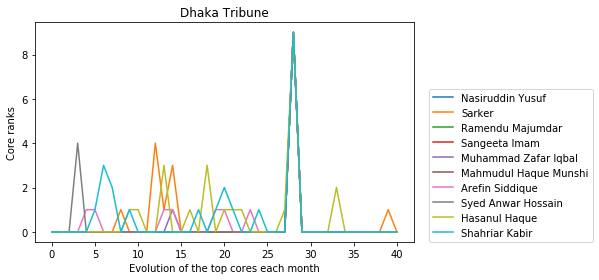

In [116]:
plt.title('Dhaka Tribune')
plt.ylabel('Core ranks')
plt.xlabel('Evolution of the top cores each month')

for k, v in d.items():
    if k == "Mahmudul Haque Munshi Gonojagoron Moncho":
        k = "Mahmudul Haque Munshi"
    plt.plot(v, label = k)
plt.legend(loc=(1.04,0))
plt.tight_layout()
plt.savefig('Figures/Evolution of Core/DT-evol-1-month-noncumulative.pdf')
# plt.show()

## DS

In [117]:
df = pd.read_pickle('Data/Processed Data/Networks/DS-network.pkl')

In [118]:
df['timestamp'] = df['timestamp'].progress_apply(fix_date)
df.sort_values(by='timestamp', inplace=True)

100%|██████████| 914208/914208 [01:36<00:00, 9475.45it/s]


In [119]:
network_type = 'person'
G = nx.Graph()
for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    if row['type0'] in network_type and row['type1'] in network_type:
        G.add_edge(row['entity0'], row['entity1'])

100%|██████████| 914208/914208 [08:39<00:00, 1761.09it/s]


In [120]:
G.remove_edges_from(nx.selfloop_edges(G))
core = nx.core_number(G)

In [121]:
maximum = max(core, key=core.get)
top_core = core[maximum]

top_cores = []

for name, core_number in core.items():
    if core_number == top_core:
        top_cores.append(name)

In [123]:
max_date_counter = 0
i = df['timestamp'].min()
while i < df['timestamp'].max() + datetime.timedelta(weeks=4):
    max_date_counter += 1
    i = i + datetime.timedelta(weeks=4)

In [124]:
max_date_counter

131

In [133]:
time = []
time.append(df['timestamp'].min())


for i in range(1, max_date_counter):
    month = 4 # 1 month = 4 weeks
    time.append(time[i-1] + datetime.timedelta(weeks=4))
    # time.append(time[0] + datetime.timedelta(weeks=month * i)) # For cumulative

In [126]:
ds = df.set_index(df['timestamp'])
ds = ds.sort_index()

ds_list = []
for i in range(len(time)-1):
    temp = ds[time[i]:time[i+1]]
    # temp = ds[time[0]:time[i+1]] # For cumulative
    ds_list.append(temp)

In [127]:
Graph_list = []

network_type = 'person'
count = 0

for df in tqdm(ds_list):
    df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]
    G = nx.Graph()
    for _, row in df.iterrows():
        # if row['type0'] in network_type and row['type1'] in network_type:
        G.add_edge(row['entity0'], row['entity1'])
    Graph_list.append(G)

100%|██████████| 130/130 [01:38<00:00,  1.32it/s]


In [128]:
Graph_list.pop() # because the core periphery on the full network is already done

In [129]:
core_list = []
for G in Graph_list:
    G.remove_edges_from(nx.selfloop_edges(G))
    core_list.append(nx.core_number(G))

In [130]:
d = {}
for person in top_cores:
    for core in core_list:
        d.setdefault(person, []).append(core.get(person, 0))

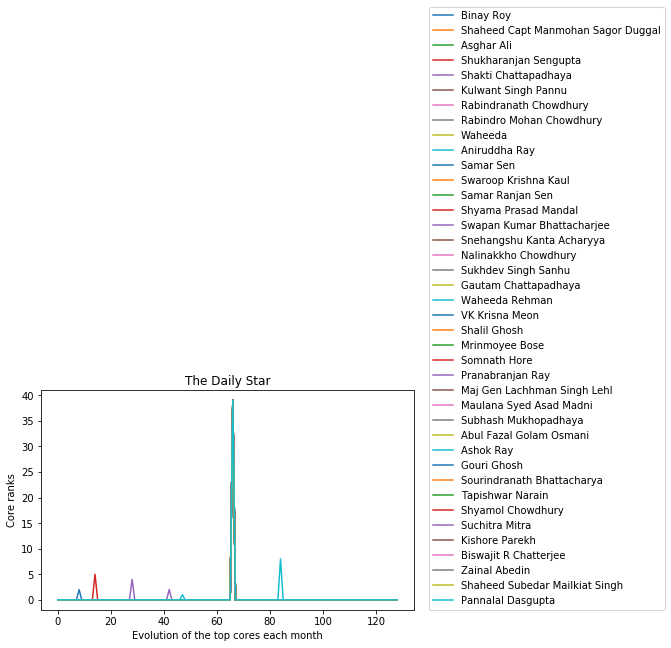

In [132]:
for k, v in d.items():
    plt.plot(v, label = k)

plt.legend(loc=(1.04,0))
plt.title('The Daily Star')
plt.ylabel('Core ranks')
plt.xlabel('Evolution of the top cores each month')
plt.tight_layout()
plt.savefig('Figures/Evolution of Core/DS-evol-1-month-noncumulative.pdf')
# plt.show()

## NA

In [218]:
df = pd.read_pickle('Data/Processed Data/Networks/NA-network.pkl')

In [219]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [220]:
df.sort_values(by='timestamp', inplace=True)

In [221]:
network_type = 'person'
G = nx.Graph()
for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    if row['type0'] in network_type and row['type1'] in network_type:
        G.add_edge(row['entity0'], row['entity1'])

100%|██████████| 820506/820506 [00:49<00:00, 16724.48it/s]


In [222]:
G.remove_edges_from(nx.selfloop_edges(G))
core = nx.core_number(G)

In [223]:
maximum = max(core, key=core.get)
top_core = core[maximum]

top_cores = []

for name, core_number in core.items():
    if core_number == top_core:
        top_cores.append(name)

In [224]:
top_cores

['Milon Bhattacharjee',
 'Mustari Safi',
 'Shamser Ali Prodhan',
 'Abu Bakar Siddique',
 'Khandker Raju Ahmed',
 'Uma Khan',
 'Niranjan Adhikari',
 'Manjusri Niyogi',
 'Mohiuddin Ahmed',
 'Firoj Chowdhury',
 'Rezwanul Haque',
 'Chittaranjan Bhuiyan',
 'Jahirul Haque',
 'M Mamun',
 'Subrata Sengupta',
 'Anu Islam',
 'Abu Nowsher',
 'Gitosree Chowdhury',
 'Azharul Islam',
 'Abu Bakar Siddique Prodhan',
 'Kolyani Ghosh',
 'Sabuj Chakrabarty',
 'Foyez Ahmad',
 'Sujit Roy',
 'Mohammed Niaz Uddin',
 'Md Nazrul Islam',
 'Aminur Rahman',
 'Sajeda Khatun',
 'Hazrat Ali Bayati',
 'Hajen Chandra Pahari',
 'Abul Kalam Azad',
 'Shafiur Rahman Dulu',
 'Mahjabin Begum',
 'Sarwar Jahan',
 'Dilip Kumar',
 'Mesbah Uddin Ahmed']

In [225]:
max_date_counter = 0
i = df['timestamp'].min()
while i < df['timestamp'].max() + datetime.timedelta(weeks=4):
    max_date_counter += 1
    i = i + datetime.timedelta(weeks=4)

In [226]:
time = []
time.append(df['timestamp'].min())


for i in range(1, max_date_counter):
    month = 4 # 1 month = 4 weeks
    time.append(time[i-1] + datetime.timedelta(weeks=4))
    # time.append(time[0] + datetime.timedelta(weeks=month * i)) # For cumulative

In [227]:
na = df.set_index(df['timestamp'])
na = na.sort_index()

na_list = []
for i in range(len(time)-1):
    temp = na[time[i]:time[i+1]]
    # temp = na[time[0]:time[i+1]] # For cumulative
    na_list.append(temp)

In [228]:
Graph_list = []

network_type = 'person'
count = 0

for df in tqdm(na_list):
    df = df[((df['type0'] == 'person') & (df['type1'] == 'person'))]
    G = nx.Graph()
    for _, row in df.iterrows():
        # if row['type0'] in network_type and row['type1'] in network_type:
        G.add_edge(row['entity0'], row['entity1'])
    Graph_list.append(G)

100%|██████████| 21/21 [00:06<00:00,  3.47it/s]


In [229]:
Graph_list.pop() # because the core periphery on the full network is already done

In [230]:
core_list = []
for G in Graph_list:
    G.remove_edges_from(nx.selfloop_edges(G))
    core_list.append(nx.core_number(G))

In [231]:
d = {}
for person in top_cores:
    for core in core_list:
        d.setdefault(person, []).append(core.get(person, 0))

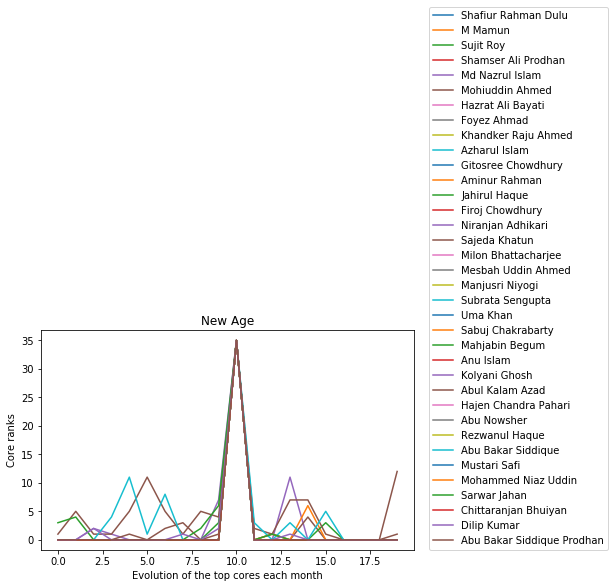

In [232]:
plt.title('New Age')
plt.ylabel('Core ranks')
plt.xlabel('Evolution of the top cores each month')

for k, v in d.items():
    plt.plot(v, label = k)
plt.legend(loc=(1.04,0))
plt.tight_layout()
# plt.savefig('Figures/Evolution of Core/NA-evol-1-month.pdf')
plt.show()